# Chapter 4

## Activation Functions

The activation functions are applied to the output of the perceptron computation. In short, it is a transformation using a specific function depending on the need. The activation functions are themselves non-linear, which allows for the mapping of non-linear functions. In general, two different types of activation functions are used in any given neural network:

- One for Hidden layer functions
- One for Output later functions

Usually, hidden layer funcation are the same type, but it is not limited to this. Ultimaly, the activation function mimics the "firing" of a neuron.

## Types of activation functions
### Step function

x = perceptron_output

- y = 1 for x > 0
- y = 0 for x <= 0


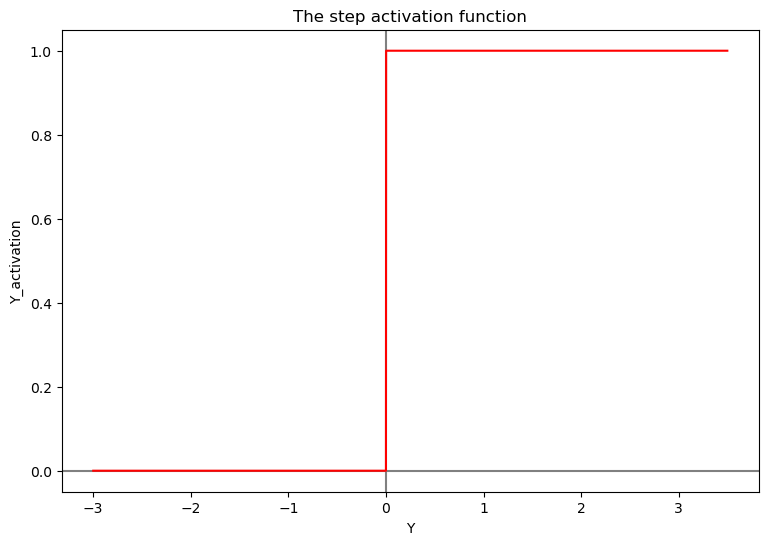

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9, 6))
plt.title("The step activation function")
plt.xlabel("Y")
plt.ylabel("Y_activation")
plt.axvline(x=0, c="grey")
plt.axhline(y=0, c="grey",)

weight = 1
bias = 0

Y = np.arange(-3, 3.5, 0.001)
Y_activation = np.empty_like(Y)


def step_function(Y):
    if Y < 0:
        Y_activation = 0
    elif Y >= 0:
        Y_activation = 1
    return Y_activation


pos = 0
for y in Y:
    y_activation = step_function(y)
    Y_activation[pos] = y_activation
    pos += 1


plt.plot(Y, Y_activation, c='red', label="step activation")

Y_activation = np.empty_like(Y)

Step-functions were used in older neural networks given the inspiration from biology, but is now rarely used.

### Linear function

x = perceptron_output

y = x for all x

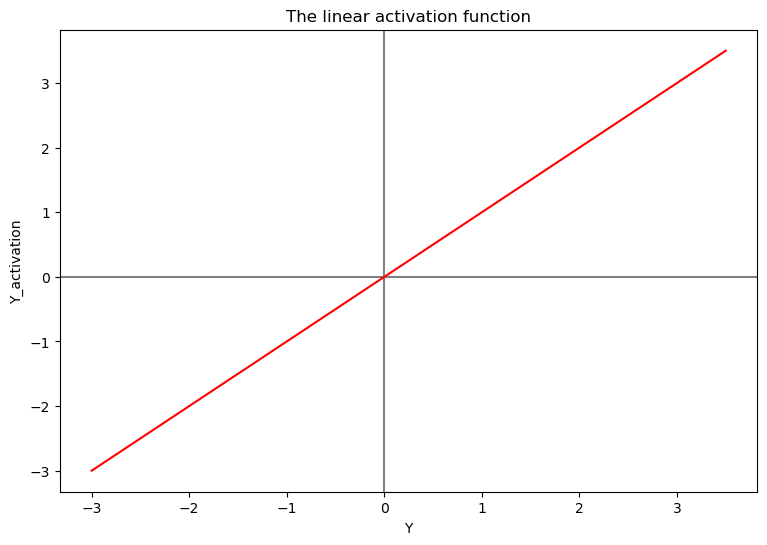

In [2]:
plt.figure(figsize=(9, 6))
plt.title("The linear activation function")
plt.xlabel("Y")
plt.ylabel("Y_activation")
plt.axvline(x=0, c="grey")
plt.axhline(y=0, c="grey",)

Y_activation = np.empty_like(Y)

pos = 0
for y in Y:
    y_activation = y
    Y_activation[pos] = y_activation
    pos += 1

plt.plot(Y, Y_activation, c='red', label="sigmoid activation")

Linear functions are applicable for use in the output layer of regression problems.

### Sigmoid function

x = perceptron_output
- y = 1/(1+e^(-x))

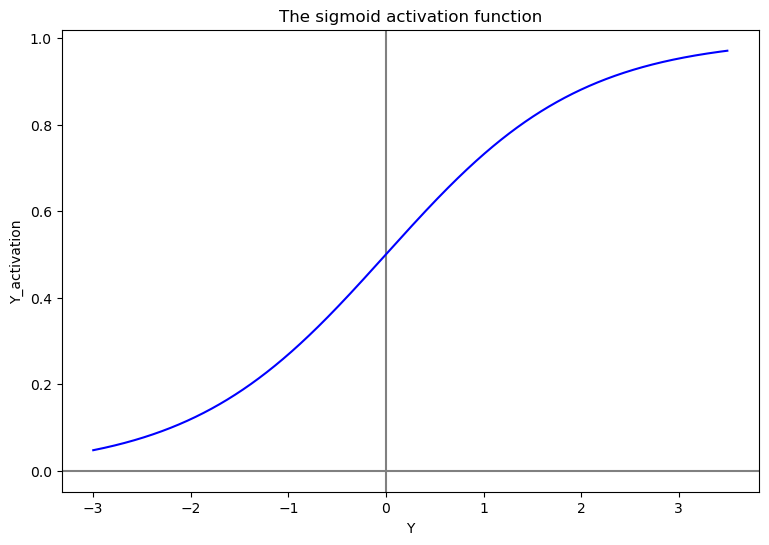

In [18]:
from scipy.special import expit

plt.figure(figsize=(9, 6))
plt.title("The sigmoid activation function")
plt.xlabel("Y")
plt.ylabel("Y_activation")
plt.axvline(x=0, c="grey")
plt.axhline(y=0, c="grey",)

Y_activation = np.empty_like(Y)

# pos = 0
# for y in Y:
#     y_activation = expit(y)
#     Y_activation[pos] = y_activation
#     pos += 1

Y_activation = expit(Y)

plt.plot(Y, Y_activation, c='blue', label="sigmoid activation")

### ReLU function

x = perceptron_output

- y = x for x > 0
- y = 0 for x <= 0

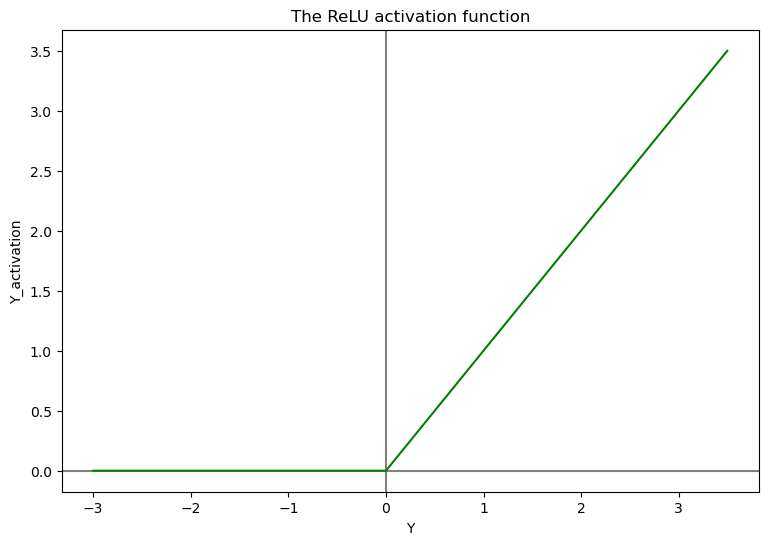

In [4]:
from scipy.special import expit

plt.figure(figsize=(9, 6))
plt.title("The ReLU activation function")
plt.xlabel("Y")
plt.ylabel("Y_activation")
plt.axvline(x=0, c="grey")
plt.axhline(y=0, c="grey",)

Y_activation = np.empty_like(Y)


def relu(x):
    return max(0.0, x)


pos = 0
for y in Y:
    y_activation = relu(y)
    Y_activation[pos] = y_activation
    pos += 1

plt.plot(Y, Y_activation, c='green', label="relu activation")

### Softmax function

Good for use with classification problems.

x = perceptron_output

- y = e^(x(i,j))/sum(e^(x(i,l))) starting with l=1

- i = current sample
- j = current output


[[-3.    -2.999 -2.998 ...  3.497  3.498  3.499]]


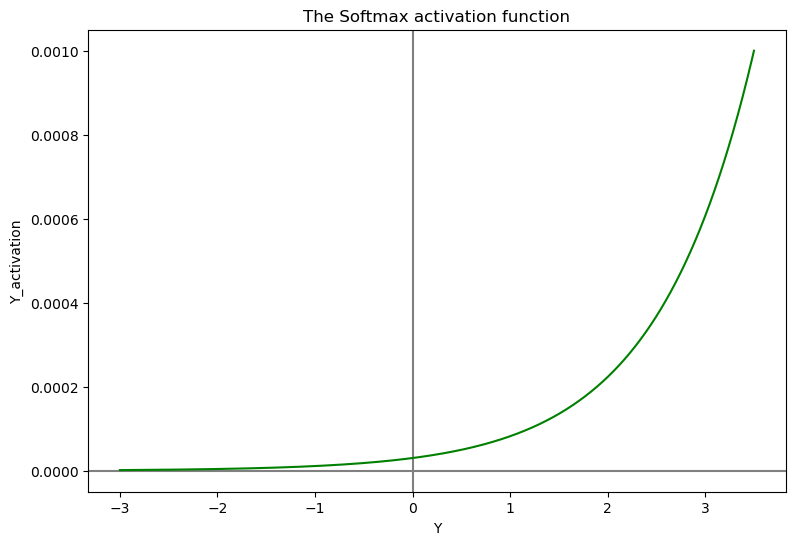

In [17]:
plt.figure(figsize=(9, 6))
plt.title("The Softmax activation function")
plt.xlabel("Y")
plt.ylabel("Y_activation")
plt.axvline(x=0, c="grey")
plt.axhline(y=0, c="grey",)

Y_np = np.array([Y])

exp_values = np.exp(Y_np - np.max(Y_np, axis=1, keepdims=True))
Y_activation = exp_values / np.sum(exp_values, axis=1, keepdims=True)

plt.plot(Y_np[0], Y_activation[0], c='green', label="softmax activation")

print(Y_np)




## Function snippets

In [ ]:
class Activation_Relu:
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)
        
class Activation_Softmax:
    def forawrd(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = probabilities
        
        
from scipy.special import expit
        
class Activation_Sigmoid:
    def forward(self, inputs):
        self.output = expit(inputs)
        
class Activation_Linear:
    def forward(self, inputs):
        self.output = inputs
        
class Activation_Step:
    def forward(self, inputs):
        if [input < 0 for input in inputs]:
            Y_activation = 0
        elif [input >= 0 for input in inputs]:
            Y_activation = 1